In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Holiday_Package.csv")
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [3]:
df.shape

(872, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [8]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


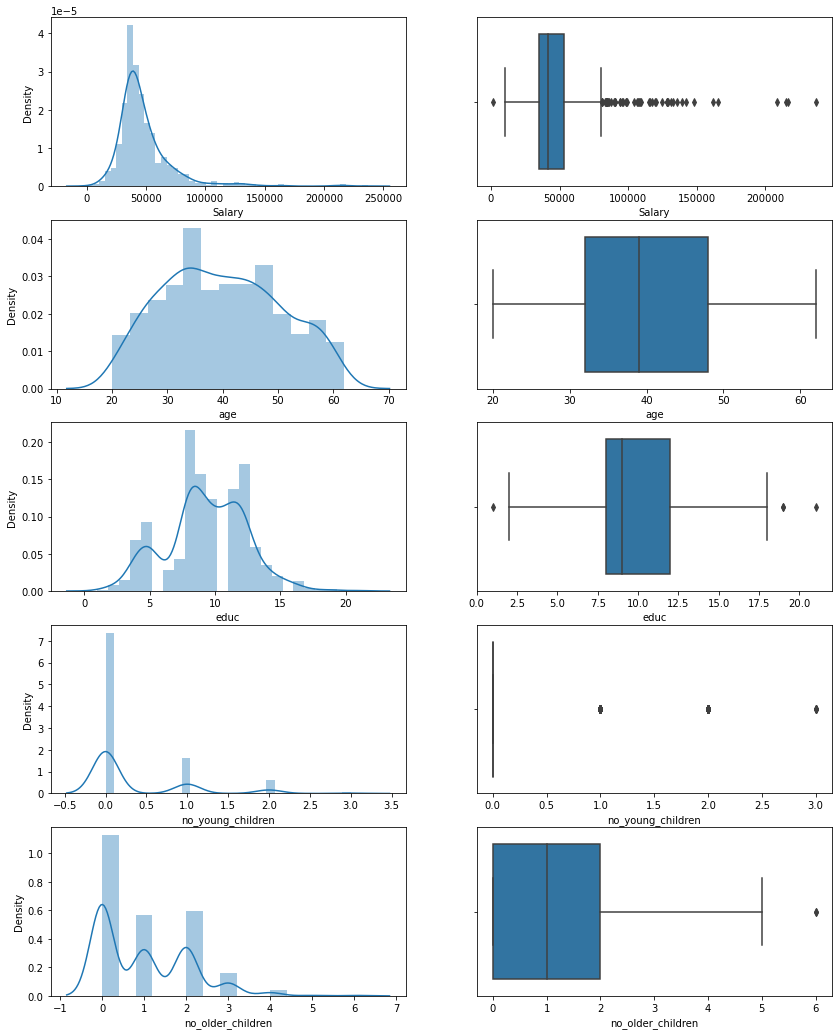

In [9]:
fig,axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14,18);

sns.distplot(df['Salary'],ax=axes[0][0])
sns.boxplot(df['Salary'],orient='H',ax=axes[0][1])

sns.distplot(df['age'],ax=axes[1][0])
sns.boxplot(df['age'],orient='H',ax=axes[1][1])

sns.distplot(df['educ'],ax=axes[2][0])
sns.boxplot(df['educ'],orient='H',ax=axes[2][1])

sns.distplot(df['no_young_children'],ax=axes[3][0])
sns.boxplot(df['no_young_children'],orient='H',ax=axes[3][1])

sns.distplot(df['no_older_children'],ax=axes[4][0])
sns.boxplot(df['no_older_children'],orient='H',ax=axes[4][1]);


<AxesSubplot:xlabel='foreign', ylabel='count'>

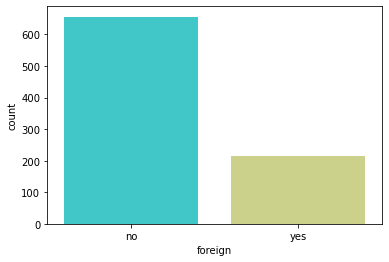

In [10]:

sns.countplot(x='foreign',data=df,palette='rainbow')

In [11]:
df.foreign.value_counts(normalize=True)


no     0.752294
yes    0.247706
Name: foreign, dtype: float64

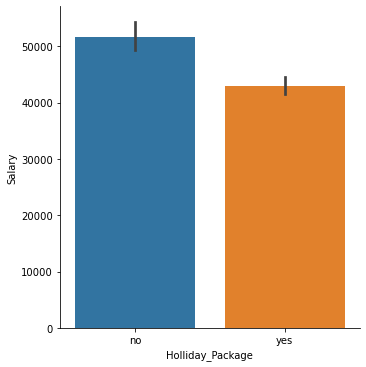

In [12]:
sns.catplot(x="Holliday_Package", y="Salary",kind="bar",data=df)

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

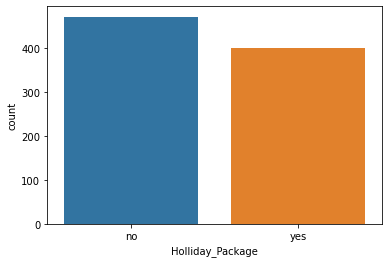

In [13]:
sns.countplot(x="Holliday_Package",data=df)

<AxesSubplot:xlabel='educ', ylabel='count'>

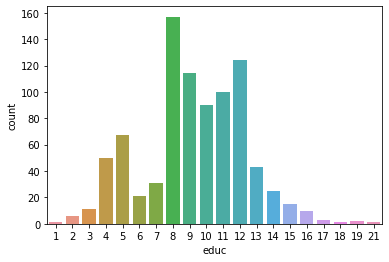

In [14]:
sns.countplot(x="educ",data=df)

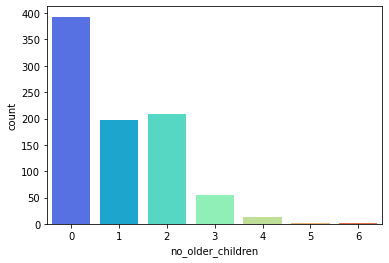

In [15]:
sns.countplot(x='no_older_children',data=df,palette='rainbow')
plt.show()

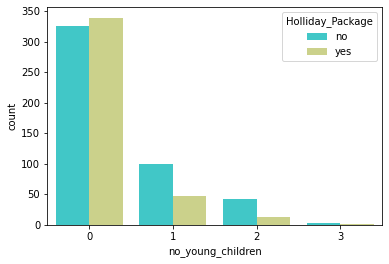

In [16]:
sns.countplot(x='no_young_children',data=df,hue='Holliday_Package',palette='rainbow')
plt.show()

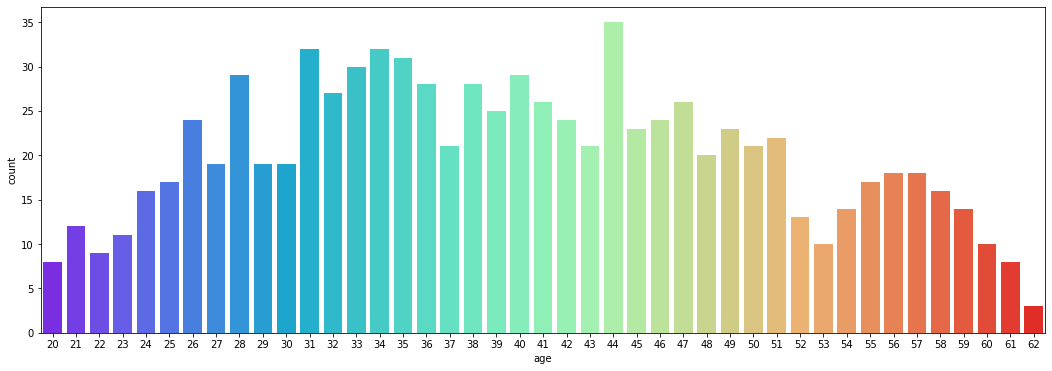

In [17]:
plt.figure(figsize=(18,6))
sns.countplot(x='age',data=df,palette='rainbow');

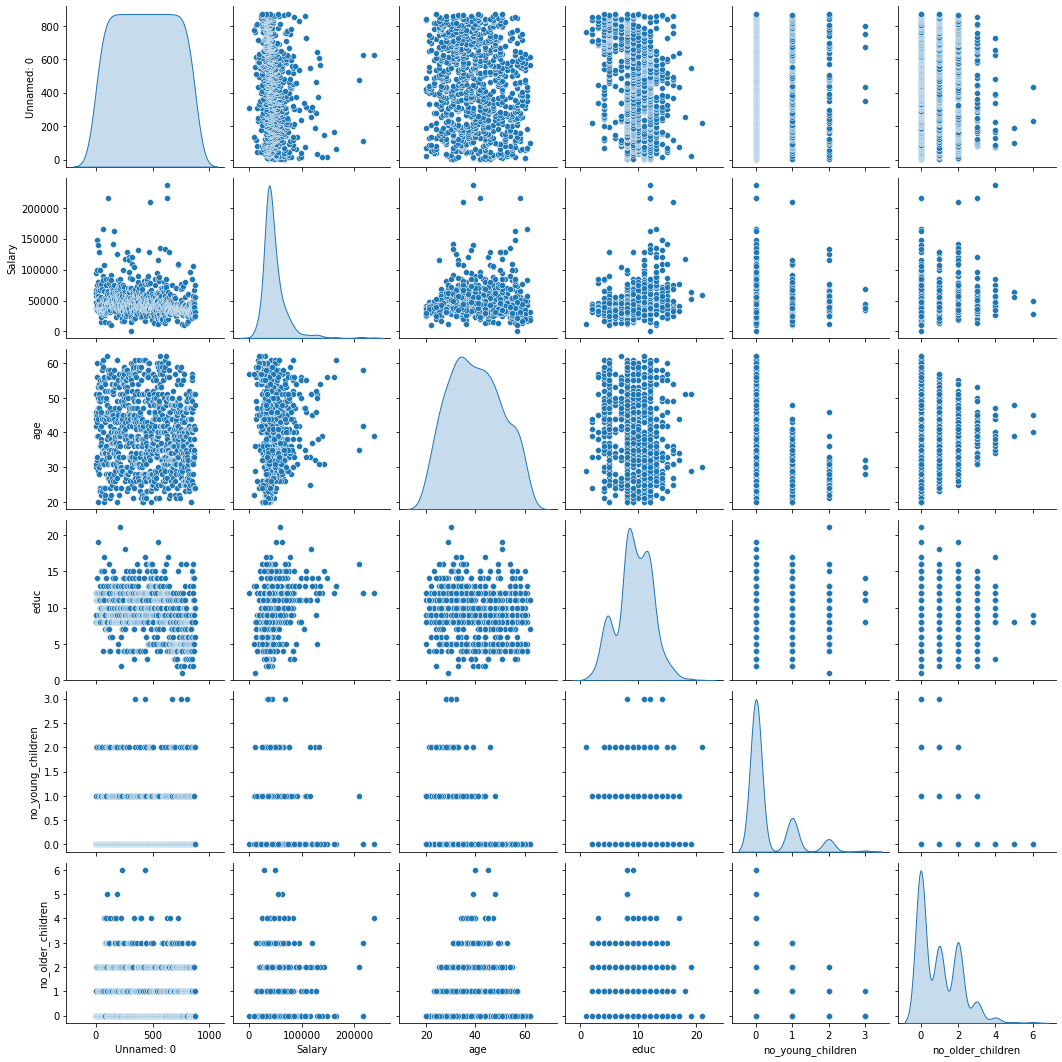

In [18]:
sns.pairplot(df,diag_kind='kde')
plt.show()

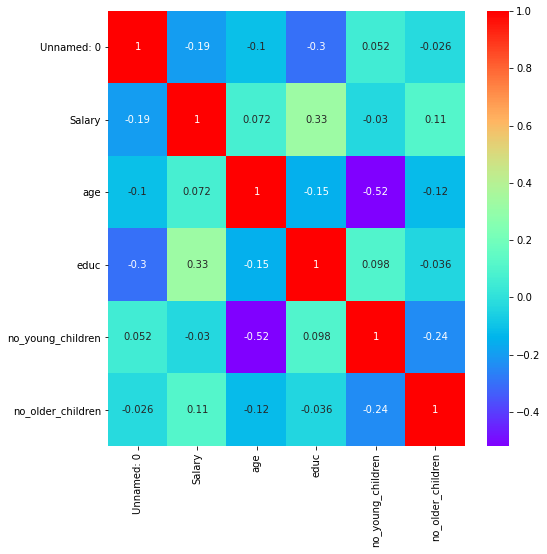

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow');

In [20]:
df.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
lrsalary,ursalary=remove_outlier(df['Salary'])
df['Salary']=np.where(df['Salary']>ursalary,ursalary,df['Salary'])
df['Salary']=np.where(df['Salary']<lrsalary,lrsalary,df['Salary'])

lrage,urage=remove_outlier(df['age'])
df['age']=np.where(df['age']>urage,urage,df['age'])
df['age']=np.where(df['age']<lrage,lrage,df['age'])

lreduc,ureduc=remove_outlier(df['educ'])
df['educ']=np.where(df['educ']>ureduc,ureduc,df['educ'])
df['educ']=np.where(df['educ']<lreduc,lreduc,df['educ'])

lryoung,uryoung=remove_outlier(df['no_young_children'])
df['no_young_children']=np.where(df['no_young_children']>uryoung,uryoung,df['no_young_children'])
df['no_young_children']=np.where(df['no_young_children']<lryoung,lryoung,df['no_young_children'])

lrold,urold=remove_outlier(df['no_older_children'])
df['no_older_children']=np.where(df['no_older_children']>urold,urold,df['no_older_children'])
df['no_older_children']=np.where(df['no_older_children']<lrold,lrold,df['no_older_children'])

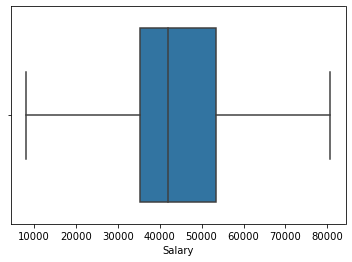

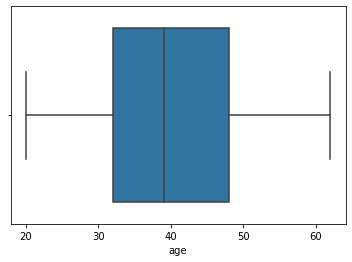

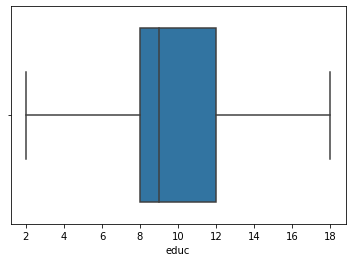

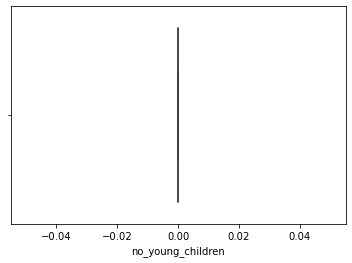

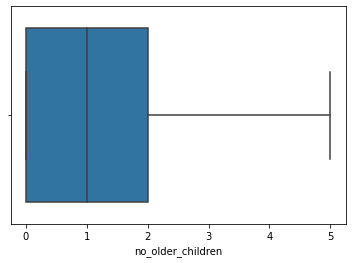

In [23]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [24]:
df1 = df.drop(columns=['Unnamed: 0'], axis=1)

In [25]:
df2=df1.copy()

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [27]:
df2 = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [28]:
df2.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                872 non-null    float64
 1   age                   872 non-null    float64
 2   educ                  872 non-null    float64
 3   no_young_children     872 non-null    float64
 4   no_older_children     872 non-null    float64
 5   Holliday_Package_yes  872 non-null    uint8  
 6   foreign_yes           872 non-null    uint8  
dtypes: float64(5), uint8(2)
memory usage: 35.9 KB


In [30]:
X = df2.drop('Holliday_Package_yes',axis=1)
y = df2.pop('Holliday_Package_yes')

X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0
2,58022.0,46.0,9.0,0.0,0.0,0
3,66503.0,31.0,11.0,0.0,0.0,0
4,66734.0,44.0,12.0,0.0,2.0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [32]:
y_train.value_counts(normalize=True)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [33]:
grid={'penalty':['l1','l2','none'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.0001,0.00001]}

In [34]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)

In [35]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [36]:
grid_search.fit(X_train, y_train)

[LibLinear]

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [37]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   verbose=True)


In [38]:
best_model = grid_search.best_estimator_

In [39]:
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

In [40]:
train_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [41]:
test_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(test_predict_prob).head()

,0,1
0,0.636852,0.363148
1,0.583823,0.416177
2,0.650672,0.349328
3,0.575439,0.424561
4,0.537743,0.462257


              precision    recall  f1-score   support

           0       0.62      0.79      0.70       329
           1       0.64      0.43      0.52       281

    accuracy                           0.63       610
   macro avg       0.63      0.61      0.61       610
weighted avg       0.63      0.63      0.61       610
 



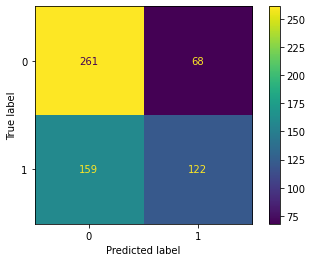

In [42]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, train_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



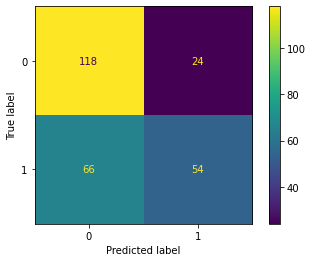

In [43]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, test_predict),'\n');

In [44]:
lr_train = best_model.score(X_train, y_train)
lr_train

0.6278688524590164

AUC: 0.662


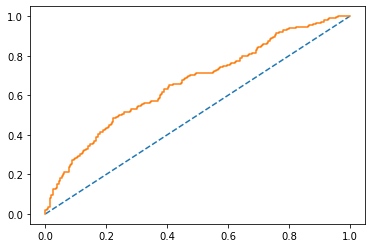

In [45]:
probs = best_model.predict_proba(X_train)
probs = probs[:, 1]
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [46]:
lr_test = best_model.score(X_test, y_test)
lr_test

0.6564885496183206

AUC: 0.675


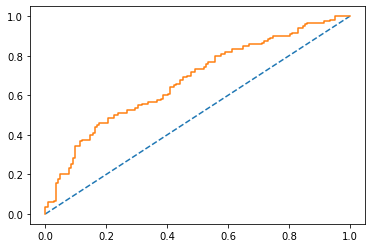

In [47]:
probs = best_model.predict_proba(X_test)
probs = probs[:, 1]
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [48]:
#LDA

In [49]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [50]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [51]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int8   
dtypes: float64(5), int8(2)
memory usage: 35.9 KB


In [52]:
X = df1.drop('Holliday_Package',axis=1)
Y = df1.pop('Holliday_Package')

X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0
2,58022.0,46.0,9.0,0.0,0.0,0
3,66503.0,31.0,11.0,0.0,0.0,0
4,66734.0,44.0,12.0,0.0,2.0,0


In [53]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [54]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
model

LinearDiscriminantAnalysis()

In [55]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [56]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)

In [57]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [58]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

In [81]:
lda_train = model.score(X_train,Y_train)
lda_train

0.6327868852459017

In [60]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [61]:
confusion_matrix(Y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

In [83]:
lda_test = model.score(X_test,Y_test)
lda_test

0.6564885496183206

In [63]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [64]:
confusion_matrix(Y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


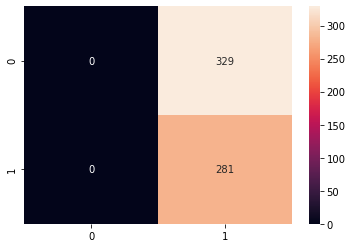

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


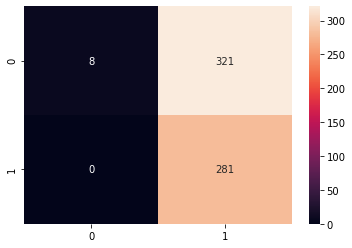

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


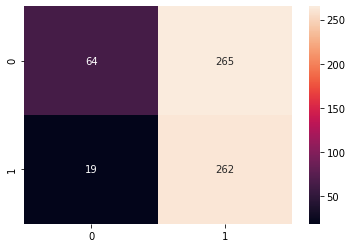

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


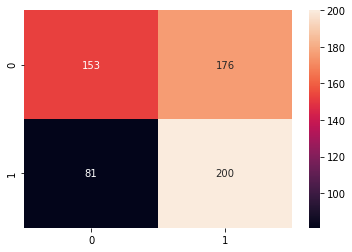

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


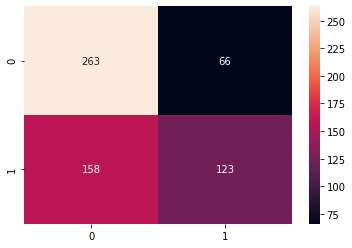

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


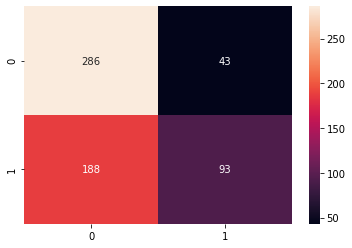

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


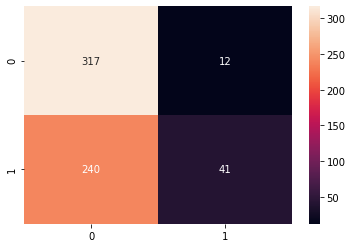

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


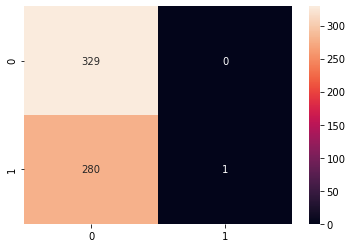

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


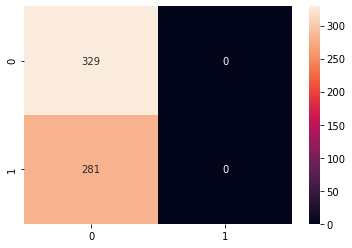

In [67]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(Y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


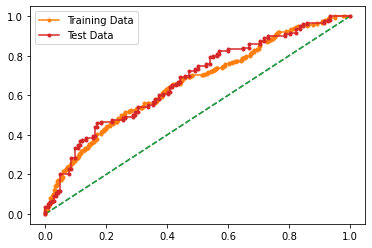

In [66]:
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training D
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(Y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();
ata: %.3f' % lda_train_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [78]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [79]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.20      0.31       142
           1       0.49      0.91      0.64       120

    accuracy                           0.52       262
   macro avg       0.60      0.55      0.47       262
weighted avg       0.61      0.52      0.46       262
 

